In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Esercizio 6
In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

## Esercizio 6.1

### Exercise 06.1

Complete the NSL_simulator code to simulate a 1D Ising model with the Gibbs sampling algorithm (the Metropolis algorithm is already implemented) to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$. Verify the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with both sampling methods, Metropolis and Gibbs\.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

# Monte Carlo Algorithms for the 1D Ising Model

Monte Carlo simulations of the one-dimensional Ising model require sophisticated sampling techniques to explore the configuration space effectively while maintaining thermodynamic consistency. Within the framework of statistical mechanics, the system operates under **canonical ensemble** conditions, where temperature remains fixed through thermal contact with an infinite heat reservoir. This thermal coupling ensures energy fluctuations while preserving the macroscopic temperature parameter throughout the computational process.

## Sampling Methodologies

Two primary stochastic algorithms facilitate the exploration of spin configurations: the **Metropolis-Hastings method** and the **Gibbs sampler**. These approaches differ fundamentally in their sampling strategies and acceptance mechanisms.

### Metropolis-Hastings Algorithm

The Metropolis-Hastings algorithm operates through a proposal-acceptance scheme. A randomly selected spin undergoes orientation reversal, creating a candidate configuration. The acceptance criterion follows detailed balance principles: configurations with lower energy (higher probability) receive unconditional acceptance, while energetically unfavorable transitions occur with probability $\exp(-\Delta E/k_B T)$. The acceptance probability can be expressed as:

$$P_{accept} = \min\left(1, \exp\left(-\frac{\Delta E}{k_B T}\right)\right)$$

where $\Delta E$ represents the energy difference between proposed and current states, calculated considering only nearest-neighbor interactions due to the model's short-range nature.

This is the implementation in `system.cpp`:
```cpp
bool System :: metro(int i){ // Metropolis algorithm
  bool decision = false;
  double delta_E, acceptance;
  if(_sim_type == 1) delta_E = this->Boltzmann(i,true) - this->Boltzmann(i,false);
  else delta_E = 2.0 * _particle(i).getspin() * 
                 ( _J * (_particle(this->pbc(i-1)).getspin() + _particle(this->pbc(i+1)).getspin() ) + _H );
  acceptance = exp(-_beta*delta_E);
  if(_rnd.Rannyu() < acceptance ) decision = true; //Metropolis acceptance step
  return decision;
}
```

The function is used in this way within the code for the evolution of the Ising Model inside the `void System :: move(int i){...} // Propose a MC move for particle i` method

```cpp
else {           // M(RT)^2
    if(_sim_type == 1){       // LJ system
      vec shift(_ndim);       // Will store the proposed translation
      for(int j=0; j<_ndim; j++){
        shift(j) = _rnd.Rannyu(-1.0,1.0) * _delta; // uniform distribution in [-_delta;_delta)
      }
      _particle(i).translate(shift, _side);  //Call the function Particle::translate
      if(this->metro(i)){ //Metropolis acceptance evaluation
        _particle(i).acceptmove();
        _naccepted++;
      } else _particle(i).moveback(); //If translation is rejected, restore the old configuration
    } else {                  // Ising 1D
      if(this->metro(i)){     //Metropolis acceptance evaluation for a spin flip involving spin i
        _particle(i).flip();  //If accepted, the spin i is flipped
        _naccepted++;
      }
    }
  }
```

### Gibbs Sampling Algorithm

In contrast, the Gibbs sampling algorithm employs a different strategy based on conditional probability distributions. Rather than proposing moves that may be rejected, this method directly samples from the conditional distribution of each spin given its local environment. For a selected spin $i$, the new orientation follows:

$$P(\sigma_i = \pm 1 | \{\sigma_j\}_{j \neq i}) = \frac{\exp(-\beta H_i(\pm 1))}{Z_i}$$

where $H_i(\pm 1)$ denotes the local energy contribution for each possible spin state, and $Z_i$ is the local partition function. This approach eliminates rejection events, potentially enhancing computational efficiency compared to the Metropolis scheme. This is the code with which I implemented Gibbs sampling. Unlike Metropolis, it was sufficient to modify the code in this way, directly in the `void System :: move(int i){...} // Propose a MC move for particle i` method.
```cpp
if(_sim_type == 3){ //Gibbs sampler for Ising
    double delta_E = 2.0 * ( _J * (_particle(this->pbc(i-1)).getspin() + _particle(this->pbc(i+1)).getspin() ) + _H ); // TO BE FIXED IN EXERCISE 6 
    double acceptance = 1./(1. + exp(-_beta*delta_E));
    if(_rnd.Rannyu() < acceptance)
      _particle(i).setspin(+1);
    else 
      _particle(i).setspin(-1);; 
    _naccepted++;
  }
```

## Comparative Analysis

Both methodologies generate ergodic Markov chains that converge to the correct canonical distribution, yet they differ in their microscopic dynamics and computational characteristics. The choice between these algorithms depends on specific system properties and computational requirements.

## Equilibration


Given that our analysis focuses on macroscopic observables including internal energy, specific heat, magnetic susceptibility, and magnetization, it is essential to establish that the system has achieved thermodynamic equilibrium prior to data acquisition. This requirement arises from the necessity for the system to adequately sample the configuration space and attain a steady-state condition, ensuring that subsequent measurements of these thermodynamic properties reflect true equilibrium values rather than transient behavior.

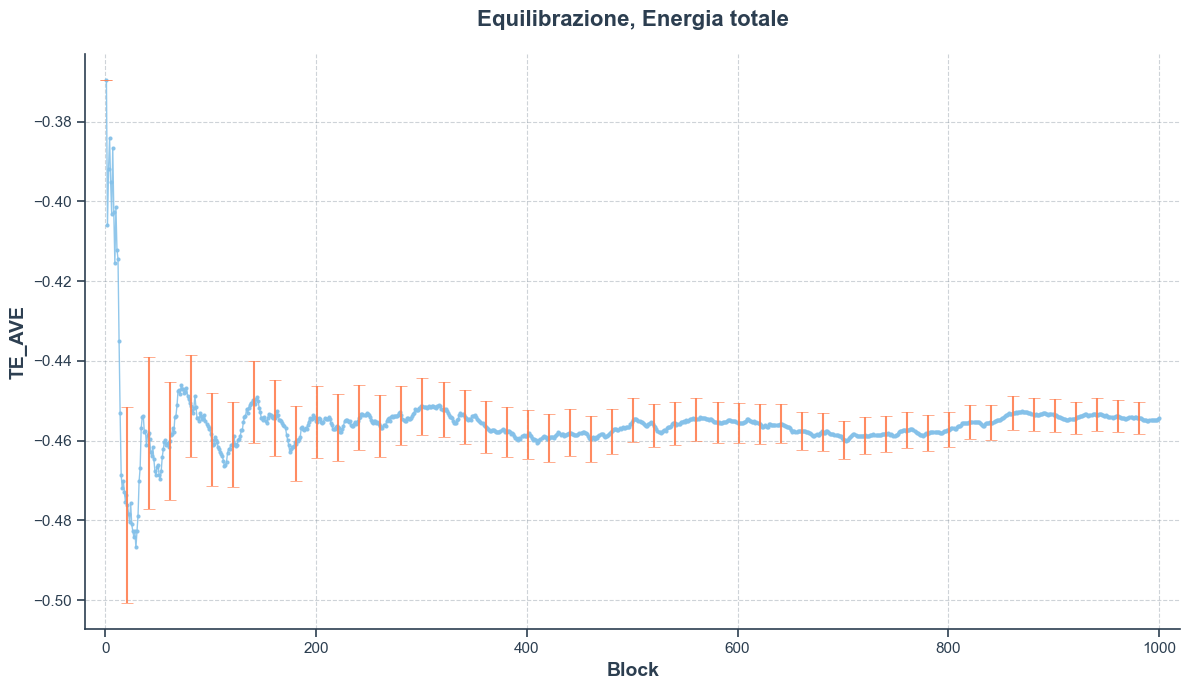

In [22]:
data = np.loadtxt('/Users/marta/Documents/LSN/06/NSL_SIMULATOR/OUTPUT_Equilibrazione/total_energy.dat')
block = data[:, 0]
te_ave = data[:, 2]
error = data[:, 3]

# Crea il grafico con stile moderno
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Plot della linea principale senza errorbars
plt.plot(block, te_ave, 'o-', color='#85C1E9', linewidth=1, markersize=2, alpha=0.9)

# Errorbars solo ogni 20 punti
step = 20
indices = range(0, len(block), step)
plt.errorbar(block[indices], te_ave[indices], yerr=error[indices], 
             fmt='none', ecolor='#FF7F50', capsize=4, capthick=0.5, alpha=0.9)

# Personalizzazione avanzata del grafico
plt.xlabel('Block', fontsize=14, fontweight='bold', color='#2C3E50')
plt.ylabel('TE_AVE', fontsize=14, fontweight='bold', color='#2C3E50')
plt.title('Equilibrazione, Energia totale',
          fontsize=16, fontweight='bold', color='#2C3E50', pad=20)

# Grid personalizzata
plt.grid(True, alpha=0.4, linestyle='--', linewidth=0.8, color='#85929E')

# Spines personalizzati
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#2C3E50')
ax.spines['bottom'].set_color('#2C3E50')
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

# Tick personalizzati
ax.tick_params(colors='#2C3E50', labelsize=11, width=1.2, length=6)

# Aggiunge un po' di padding
plt.margins(x=0.02, y=0.05)
plt.tight_layout()
plt.show()

## The script
The best way to solve this exercise was to create a script that would allow me to run all types of simulations sequentially without having to continuously manually change the input.dat file to obtain the desired results. I chose to create a Python script within a dedicated notebook so that I could explain step by step the operations performed.

# Results

## Simulation with the Metropolis algorithm

Per fare questo ho usato l'algoritmo di Metropolis già implementato. 
Ho implementato il calcolo di magnetizzazione secondo la formula, nella funzione measure. Il calcolo di Chi, nella funzione measure. Il calcolo di C_v è parzialmente implementato in measure e parte in average in quanto mi serviva il valor medio di H che è pronto per essere usato solamente quando la variabile di accumulazione è completa. 

<>:28: SyntaxWarning: invalid escape sequence '\c'
<>:28: SyntaxWarning: invalid escape sequence '\c'
/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_2462/759201135.py:28: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('susceptibility ($\chi$)')
/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_2462/759201135.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('NSL_SIMULATOR/OUTPUT_METRO_NO_H/METROPOLIS/chi.dat', header=None, delim_whitespace=True)


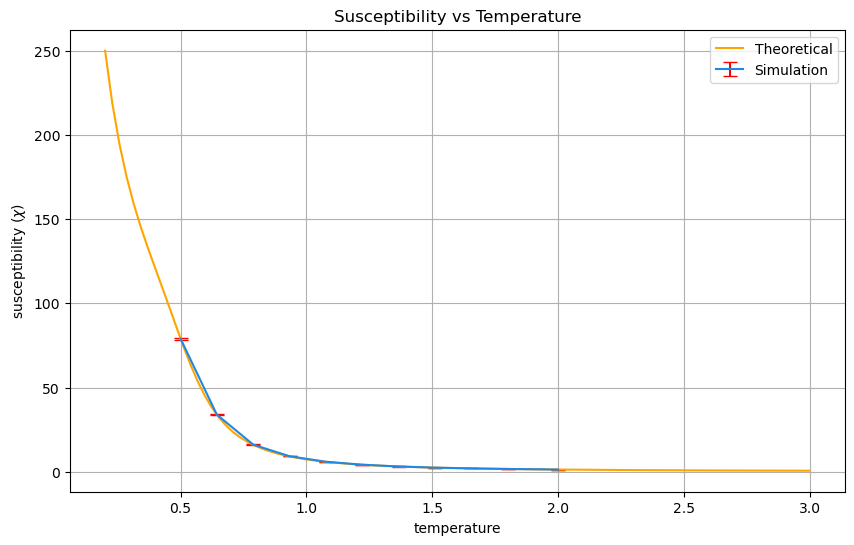

In [3]:
# Read the data and skip the first row (header)
data = pd.read_csv('NSL_SIMULATOR/OUTPUT_METRO_NO_H/METROPOLIS/chi.dat', header=None, delim_whitespace=True)

# Extract the columns
x = data[0]
y = data[1]
yerr = data[2]

# Plot the data with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color='#1E88E5', ecolor='r', capsize=5, label='Simulation')
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
# Calculate theoretical susceptibility
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

# Plot the theoretical curve
plt.plot(T, X, label='Theoretical', color='orange')

# Add labels, title, legend, and grid
plt.xlabel('temperature')
plt.ylabel('susceptibility ($\chi$)')
plt.title('Susceptibility vs Temperature')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_2462/1892558520.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('NSL_SIMULATOR/OUTPUT_METRO_NO_H/METROPOLIS/tenergy.dat', header=None, delim_whitespace=True)


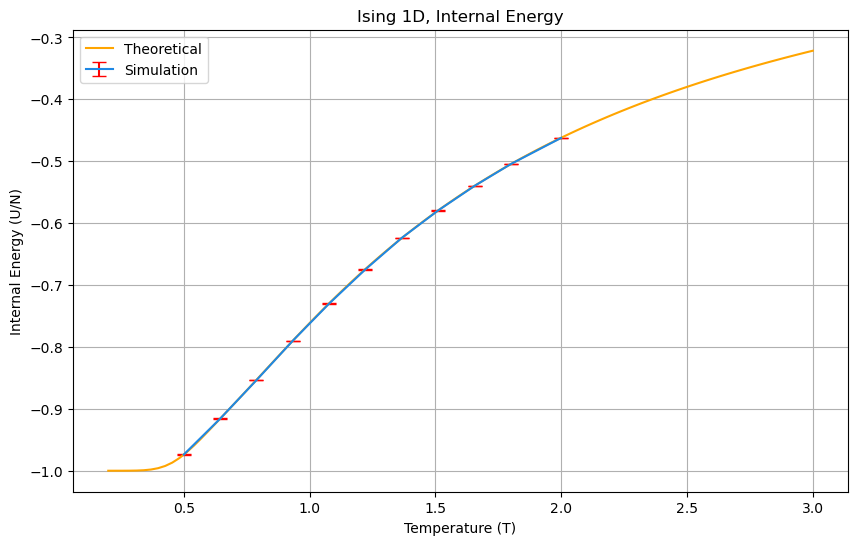

In [4]:
# Read the data and skip the first row (header)
data = pd.read_csv('NSL_SIMULATOR/OUTPUT_METRO_NO_H/METROPOLIS/tenergy.dat', header=None, delim_whitespace=True)

# Extract the columns
x = data[0]
y = data[1]
yerr = data[2]

# Plot the data with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color='#1E88E5', ecolor='r', capsize=5, label='Simulation')

# Calculate theoretical internal energy
e = -J * (th + ch * thN) / (1 + thN)

# Plot the theoretical curve
plt.plot(T, e, label='Theoretical', color='orange')

# Add labels, title, legend, and grid
plt.title('Ising 1D, Internal Energy')
plt.xlabel('Temperature (T)')
plt.ylabel('Internal Energy (U/N)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_2462/128647292.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('NSL_SIMULATOR/OUTPUT_METRO_NO_H/METROPOLIS/cv.dat', header=None, delim_whitespace=True)


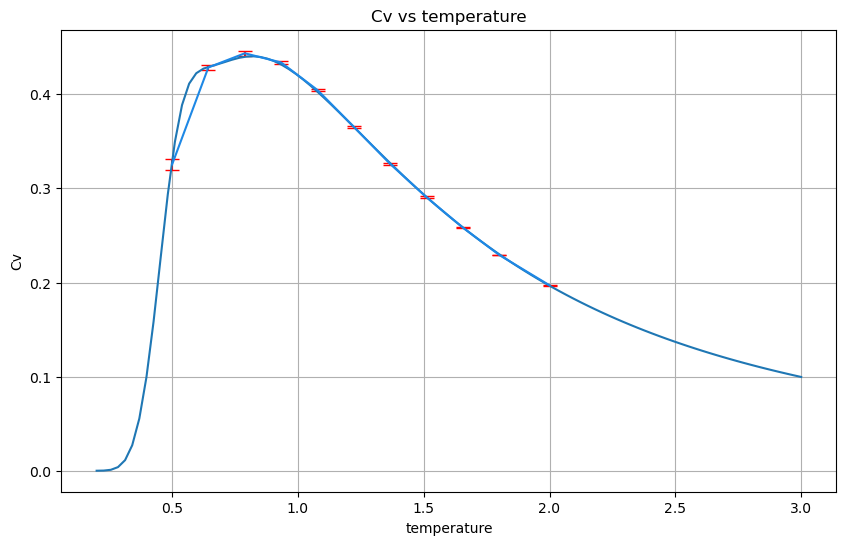

In [5]:
# Read the data and skip the first row (header)
data = pd.read_csv('NSL_SIMULATOR/OUTPUT_METRO_NO_H/METROPOLIS/cv.dat', header=None, delim_whitespace=True)

# Extract the columns
x = data[0]
y = data[1]
yerr = data[2]

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

# Create the plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color='#1E88E5', ecolor='r', capsize=5)
plt.plot(T, heat)
plt.xlabel('temperature')
plt.ylabel('Cv')
plt.title('Cv vs temperature')
plt.grid(True)
plt.show()

/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_2462/2415850334.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('NSL_SIMULATOR/OUTPUT_METRO_H/METROPOLIS/magnet.dat', header=None, delim_whitespace=True)


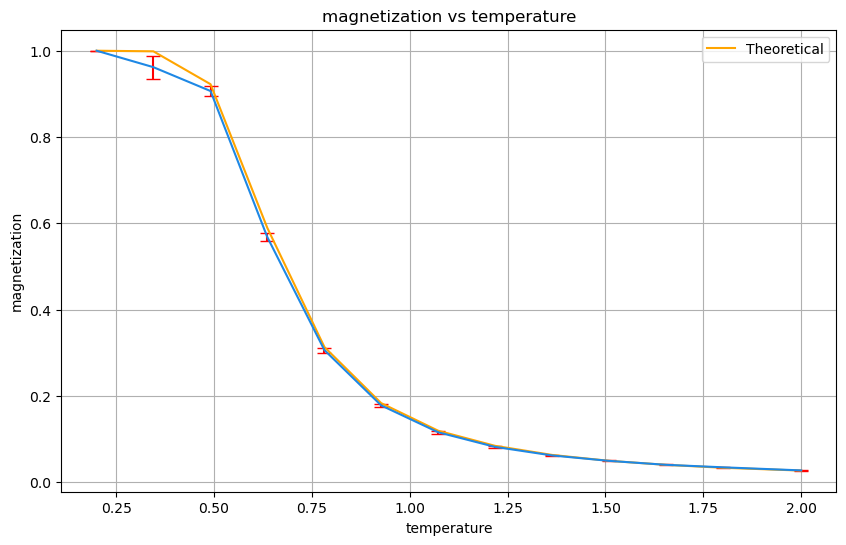

In [6]:
# Read the data and skip the first row (header)
data = pd.read_csv('NSL_SIMULATOR/OUTPUT_METRO_H/METROPOLIS/magnet.dat', header=None, delim_whitespace=True)

# Extract the columns
x = data[0]
y = data[1]
yerr = data[2]

# Create the plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color='#1E88E5', ecolor='r', capsize=5)
plt.xlabel('temperature')
plt.ylabel('magnetization')
plt.title('magnetization vs temperature')
plt.grid(True)
# Define constants
J = 1  # Interaction constant
Ns = 100  # Number of spins
h = 0.02

# Calculate theoretical values
T = x  # Use the x values (temperature) from the data
b = 1 / T

l1 = np.exp(b * J) * np.cosh(b * h) + np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) ** 2 - 2 * np.sinh(2 * b * J))
l2 = np.exp(b * J) * np.cosh(b * h) - np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) ** 2 - 2 * np.sinh(2 * b * J))
Z = l1 ** Ns + l2 ** Ns
M = (np.exp(b * J) * np.sinh(b * h) * ((l1 ** (Ns - 1)) * (1 + np.exp(b * J) * np.cosh(b * h) / np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) ** 2 - 2 * np.sinh(2 * b * J))) +
    (l2 ** (Ns - 1)) * (1 - np.exp(b * J) * np.cosh(b * h) / np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) ** 2 - 2 * np.sinh(2 * b * J))))) / Z

# Plot the theoretical curve
plt.plot(T, M, label='Theoretical', color='orange')

# Add legend and show the plot
plt.legend()
plt.show()

## Simulation with Gibbs Algorithm

<>:28: SyntaxWarning: invalid escape sequence '\c'
<>:28: SyntaxWarning: invalid escape sequence '\c'
/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_2462/2760184782.py:28: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('susceptibility ($\chi$)')
/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_2462/2760184782.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('NSL_SIMULATOR/OUTPUT_GIBBS_NO_H/GIBBS/chi.dat', header=None, delim_whitespace=True)


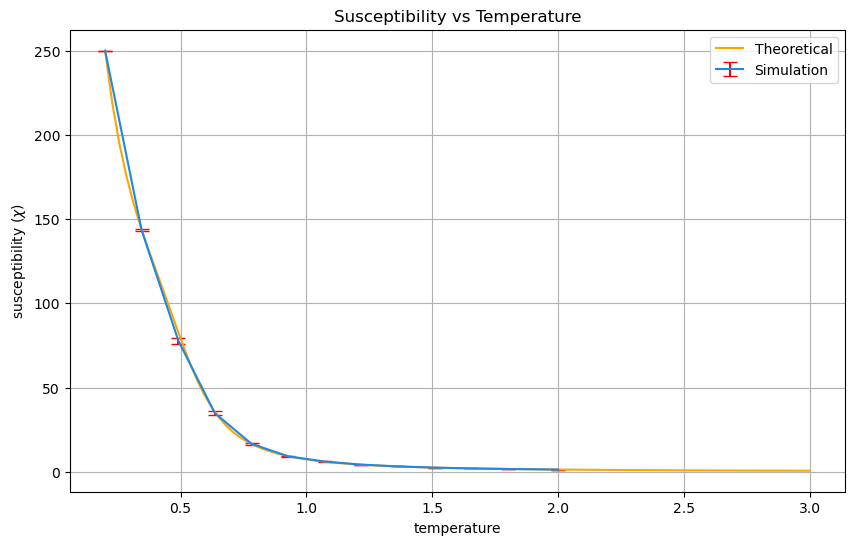

In [7]:
# Read the data and skip the first row (header)
data = pd.read_csv('NSL_SIMULATOR/OUTPUT_GIBBS_NO_H/GIBBS/chi.dat', header=None, delim_whitespace=True)

# Extract the columns
x = data[0]
y = data[1]
yerr = data[2]

# Plot the data with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color='#1E88E5', ecolor='r', capsize=5, label='Simulation')
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
# Calculate theoretical susceptibility
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

# Plot the theoretical curve
plt.plot(T, X, label='Theoretical', color='orange')

# Add labels, title, legend, and grid
plt.xlabel('temperature')
plt.ylabel('susceptibility ($\chi$)')
plt.title('Susceptibility vs Temperature')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_2462/842691833.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('NSL_SIMULATOR/OUTPUT_GIBBS_NO_H/GIBBS/tenergy.dat', header=None, skiprows=1, delim_whitespace=True)


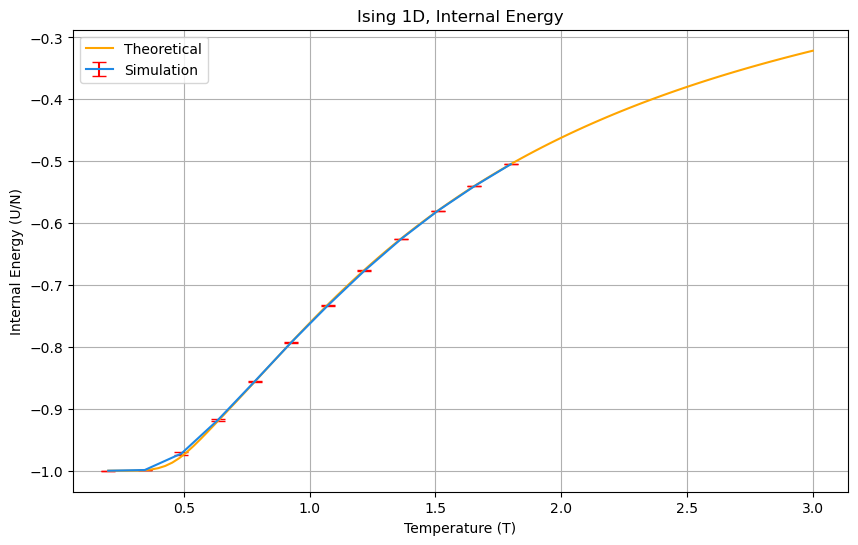

In [8]:
# Read the data and skip the first row (header)
data = pd.read_csv('NSL_SIMULATOR/OUTPUT_GIBBS_NO_H/GIBBS/tenergy.dat', header=None, skiprows=1, delim_whitespace=True)

# Extract the columns
x = data[0]
y = data[1]
yerr = data[2]

# Plot the data with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color='#1E88E5', ecolor='r', capsize=5, label='Simulation')

# Calculate theoretical internal energy
e = -J * (th + ch * thN) / (1 + thN)

# Plot the theoretical curve
plt.plot(T, e, label='Theoretical', color='orange')

# Add labels, title, legend, and grid
plt.title('Ising 1D, Internal Energy')
plt.xlabel('Temperature (T)')
plt.ylabel('Internal Energy (U/N)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_2462/3727967731.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('NSL_SIMULATOR/OUTPUT_GIBBS_NO_H/GIBBS/cv.dat', header=None, delim_whitespace=True)


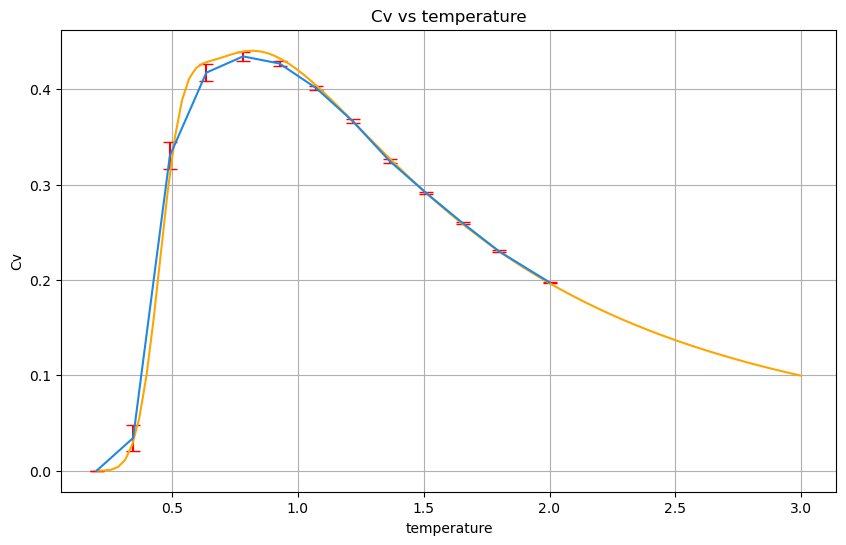

In [9]:
# Read the data and skip the first row (header)
data = pd.read_csv('NSL_SIMULATOR/OUTPUT_GIBBS_NO_H/GIBBS/cv.dat', header=None, delim_whitespace=True)

# Extract the columns
x = data[0]
y = data[1]
yerr = data[2]

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

# Create the plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color='#1E88E5', ecolor='r', capsize=5)
plt.plot(T, heat, label='Theoretical', color='orange')
plt.xlabel('temperature')
plt.ylabel('Cv')
plt.title('Cv vs temperature')
plt.grid(True)
plt.show()

/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_2462/3821624315.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('NSL_SIMULATOR/OUTPUT_GIBBS_H/GIBBS/magnet.dat', header=None, delim_whitespace=True)


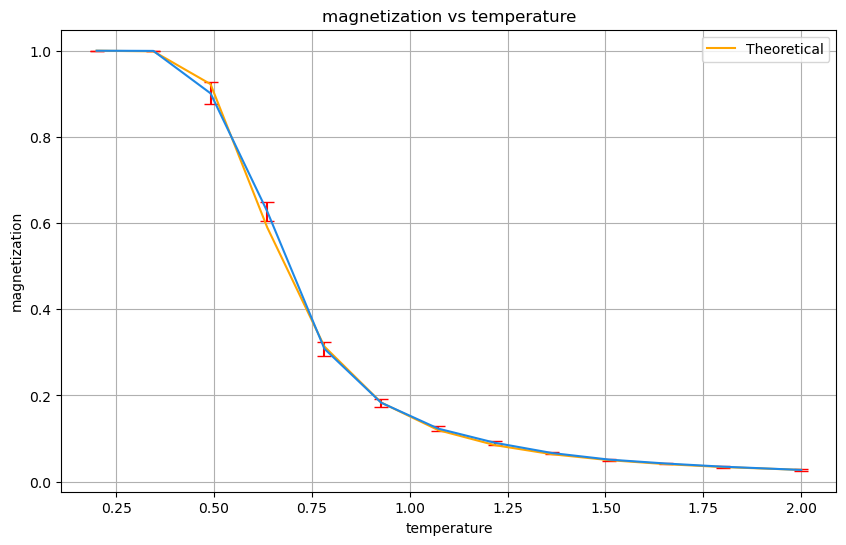

In [10]:
# Read the data and skip the first row (header)
data = pd.read_csv('NSL_SIMULATOR/OUTPUT_GIBBS_H/GIBBS/magnet.dat', header=None, delim_whitespace=True)

# Extract the columns
x = data[0]
y = data[1]
yerr = data[2]

# Create the plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color='#1E88E5', ecolor='r', capsize=5)
plt.xlabel('temperature')
plt.ylabel('magnetization')
plt.title('magnetization vs temperature')
plt.grid(True)
# Define constants
J = 1  # Interaction constant
Ns = 100  # Number of spins
h = 0.02

# Calculate theoretical values
T = x  # Use the x values (temperature) from the data
b = 1 / T

l1 = np.exp(b * J) * np.cosh(b * h) + np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) ** 2 - 2 * np.sinh(2 * b * J))
l2 = np.exp(b * J) * np.cosh(b * h) - np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) ** 2 - 2 * np.sinh(2 * b * J))
Z = l1 ** Ns + l2 ** Ns
M = (np.exp(b * J) * np.sinh(b * h) * ((l1 ** (Ns - 1)) * (1 + np.exp(b * J) * np.cosh(b * h) / np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) ** 2 - 2 * np.sinh(2 * b * J))) +
    (l2 ** (Ns - 1)) * (1 - np.exp(b * J) * np.cosh(b * h) / np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) ** 2 - 2 * np.sinh(2 * b * J))))) / Z

# Plot the theoretical curve
plt.plot(T, M, label='Theoretical', color='orange')

# Add legend and show the plot
plt.legend()
plt.show()